## Mathematical operations with reversed place value encoded positive integers

In [1]:
# encode number 12 -> [2, 1]
def eN(n):
    return list(map(int, reversed(str(n))))
# decode number [0, 0, 1] -> 100
def dN(l):
    return int(''.join(map(str, reversed(l))))
# divmod but in reverse order
def div(n, base = 10):
    return [n % base, n // base]
# is place value number zero? [0] = True, [1] = False, [0, 1] = False,...
def is_zero(n):
    return not n[1:] and not n[0]
# multiplication
def multiply(a, b, base = 10):
    def _(c, d, f = [], g = [], e = []):
        if not b and not c:
            return g + (e if e[1] else e[:1])
        if c:
            x = div(c[0] * d + (e[1] if e else 0) + (f.pop(0) if f else 0), base)
            return _(c[1:], d, f, (g + e[:1] if e else g), x)
        return g[:1] + _(a, b.pop(0), g[1:] + e)
    return _(a, b.pop(0), [], [])
# successor function
def succ(n, base = 10):
    def _(a, b):
        # if the list is empty, return list with the first item
        # note that in base 2 the max value is 1
        if not a:
            return [1]
        elif a[0] < b:
            # increase the first digit and return the rest of the list intact
            return [a[0]+1] + a[1:]
        else:
            # add zero to the list and append the rest of the list recursively modified
            return [0] + _(a[1:], b)
    return _(n, base-1)
# predecessor function
def pred(n, base = 10):
    def _(a, b):
        # if the first item of the list one or more
        if a[0]:
            # decrease the first by one and return the list
            a[0] -= 1
            return a
        # the first item on the list is zero but there are more than two items
        # so we need to deal with all the rest
        if a[2:]:
            # return the base-1 as the first item and scan the rest of the list
            return b + _(a[1:], b)
        # there are only two items on the list, the first item is zero and the second item 
        # is greater than one -> change the first item that is zero to base minus one, 
        # i.e.e 9 in base 10 and decrease the second item by one
        elif a[1] > 1:
            return b + [a[1]-1]
        # in other cases return base-1
        return b
    return _(n, [base-1])
# exponentiation function
def power(a, b, base = 10):
    def _(a, b):
        return [1] if is_zero(b) else multiply(a, _(a, pred(b, base)), base)
    return _(a, b)
# summation function
def summ(a, b, base = 10):
    def _(c, d):
        return c if is_zero(d) else _(succ(c, base), pred(d, base))
    return _(a, b)
# substraction function
def subs(a, b, base = 10):
    def _(c, d):
        return d if is_zero(c) else _(pred(c, base), pred(d, base))
    return _(a, b)

In [2]:
pred(pred([1, 2]))

[9, 1]

In [3]:
%%timeit
summ([3], [1, 3])

55.1 µs ± 10.4 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [4]:
%%timeit
succ([9, 9, 9])

1.34 µs ± 153 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [5]:
%%timeit
subs([1], [0, 0, 0, 1])

2.98 µs ± 410 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [6]:
%%timeit
pred([0, 0, 0, 1])

1.33 µs ± 91.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [7]:
%%timeit
power([3], [3])

8.17 µs ± 997 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
%%timeit
is_zero([0])

197 ns ± 8.35 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [9]:
pred(pred(pred(pred(pred(pred(pred(pred(pred(eN(9))))))))))

[0]

In [10]:
multiply(eN(216), eN(216))

[6, 5, 6, 6, 4]

In [11]:
summ(eN(12), eN(12))

[4, 2]

In [12]:
subs(eN(998), eN(999))

[1]

In [13]:
succ(succ(succ([0])))

[3]

In [14]:
power(eN(2), eN(4))

[6, 1]

In [15]:
%%timeit
multiply([9, 9, 9, 9, 9, 9, 9, 9, 9], [9, 9, 9, 9, 9, 9, 9, 9, 9])

80.5 µs ± 6.69 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
%%timeit
999999999*999999999

11.8 ns ± 0.477 ns per loop (mean ± std. dev. of 7 runs, 100000000 loops each)


In [17]:
from functools import reduce

(reduce(lambda x, y: x and y, [dN(succ(eN(n)))-1==n for n in range(216)]),
 reduce(lambda x, y: x and y, [dN(pred(eN(n)))+1==n for n in range(1, 216)]))

(True, True)

In [18]:

def mul(a, b, base = 10):
    # init function with some default values
    def _(c, d, f = [], h = [], g = [], e = 0):
        # if there are no more items in list d, this is the end result
        if not d:
            return h + f
        # if there are items in list list c, get integer and reminder parts and other stuff 
        # and proceed with the rest of the list c
        if c:
            x = divmod(c[0] * d[0] + (f.pop(1) if len(f) > 1 else 0) + e, base)
            return _(c[1:], d, f, h, g + [x[1]], x[0])
        # else we have reached the end of the list c and must begin again with the rest of the list d!
        # also append reminders to the result lists h and f, not that content of f comes from g at this point
        return _(a, d[1:], (g + [e] if e else g), (h + [f[0]] if f else h))
    # start calling the recursive function and return the end result
    return _(a, b)

def mul(a, b, base = 10):
    # define the recursive multiplication function with some default values
    # c is the tail of a and will be reset to original a when iterated all though
    # b is the original b and iterated only once until end
    # l and m are the integer and denominator parts carried on the process
    # l is from the previous iteration
    # m is the currently collected list that will be l on the last round
    # r is the last denominator as a number
    def _(c, b, r = [0, 0], l = [], m = []):
        # if there are no more items in list d, this is the end result
        if not b:
            return []
        # if there are items in list (c), get integer and reminder parts
        # and proceed with the rest of the list c
        if c:
            x = divmod(c[0] * b[0] + (l[0] if l else 0) + r[0], base)
            return _(c[1:], b, x, l[1:], m+[r[1]])
        # else we have reached the end of the list (c) and must begin again from a with the rest of the list (d)!
        # also append reminders (e) to the result list (f), note that content of (f) comes from (g) at this point
        return m[:1] + _(a[1:], b[1:], divmod((a[0] * (b[1] if len(b) > 1 else b[0])) + m[-1], base), [r[1], r[0]])
    # start calling the recursive multiplication function and return the result list
    return _(a[1:], b, divmod(a[0] * b[0], base))

def mul(a, b, base = 10):
    # define the recursive multiplication function with some default values
    # c is the tail of a and will be reset to original a when iterated all though
    # b is the original b and iterated only once until end
    # l and m are the integer and denominator parts carried on the process
    # l is from the previous iteration
    # m is the currently collected list that will be l on the last round
    # r is the last denominator as a number
    def _(c, b, l = [], m = [], r = 0):
        # if there are no more items in list d, this is the end result
        if not b:
            return l
        # if there are items in list (c), get integer and reminder parts
        # and proceed with the rest of the list c
        if c:
            x = divmod(c[0] * b[0] + (l.pop(1) if len(l) > 1 else 0) + r, base)
            return _(c[1:], b, l, m + [x[1]], x[0])
        # else we have reached the end of the list (c) and must begin again from a with the rest of the list (d)!
        # also append reminders (e) to the result list (f), note that content of (f) comes from (g) at this point
        x = _(a, b[1:], (m + [r] if r else m))
        return [l[0]] + x if l else x
    # start calling the recursive multiplication function and return the result list
    return _(a, b)

In [19]:
%%timeit
mul([9, 9, 9, 9, 9, 9, 9, 9, 9], [9, 9, 9, 9, 9, 9, 9, 9, 9])

86.4 µs ± 11.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [21]:
%matplotlib inline
import sys, os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame as df

print(sys.version, "Matplotlib:", mpl.__version__)
print(mpl.get_backend())

3.6.2 | packaged by conda-forge | (default, Jul 23 2017, 22:58:45) [MSC v.1900 64 bit (AMD64)] Matplotlib: 2.1.0
module://ipykernel.pylab.backend_inline


In [22]:
def heat(d):
    plt.rcParams["axes.grid"] = False
    plt.imshow(d)
    plt.show()

def _coef(n):
    # 216 -> poly1d([2, 1, 6])
    return np.poly1d(list(map(int, str(n))))

def coef(i, j, cb):
    return cb(_coef(i) * _coef(j)) + 1

def coeft(l, cb):
    for i in l:
        mm = []
        for j in l:
            mm.append(coef(i, j, cb))
        yield mm

def coeftt(l, cb):
    m = []
    for i in l:
        mm = []
        for j in l:
            mm.append(coef(i, j, cb))
        m.append(mm)
    return m

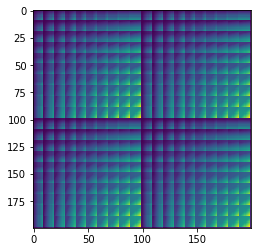

In [23]:
heat(coeftt(range(1, 201), max))

In [24]:
# numeric data with level 216
l = range(1, 201)
co = coeft(l, max)
df(co, columns=l, index=l)

,1,2,3,4,5,6,7,8,9,10,...,191,192,193,194,195,196,197,198,199,200
1,2,3,4,5,6,7,8,9,10,2,...,10,10,10,10,10,10,10,10,10,3
2,3,5,7,9,11,13,15,17,19,3,...,19,19,19,19,19,19,19,19,19,5
3,4,7,10,13,16,19,22,25,28,4,...,28,28,28,28,28,28,28,28,28,7
4,5,9,13,17,21,25,29,33,37,5,...,37,37,37,37,37,37,37,37,37,9
5,6,11,16,21,26,31,36,41,46,6,...,46,46,46,46,46,46,46,46,46,11
6,7,13,19,25,31,37,43,49,55,7,...,55,55,55,55,55,55,55,55,55,13
7,8,15,22,29,36,43,50,57,64,8,...,64,64,64,64,64,64,64,64,64,15
8,9,17,25,33,41,49,57,65,73,9,...,73,73,73,73,73,73,73,73,73,17
9,10,19,28,37,46,55,64,73,82,10,...,82,82,82,82,82,82,82,82,82,19
10,2,3,4,5,6,7,8,9,10,2,...,10,10,10,10,10,10,10,10,10,3
